<a href="https://colab.research.google.com/github/ShettyMahalakshmi/Neural-Network/blob/master/MushroomclassificationANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mushroom classification by useing Artificial Neural Network
Artificial Neural Network --
Artificial Neural Network, ANN, is a type of machine learning that uses nodes and tries to resemble the human brain. We teach these models by constructing nodes together into layers. We then construct multiple layers together into a model.

A node receives a summation of inputs from all previous nodes firing to it. If the input is high enough, this will trigger the node to "fire" itself. What the node "fires" is a product of the summation of the input and the activation function. If the threshold is not met, the node may not fire. 

The first layer is the input layer, the last layer is the output layer, and all the layers in between are "hidden" layers. They are called hidden because we are unable to see both their inputs and outputs. It is a mystery as to what is happening in these layers. "Deep Learning" is a term used to coin these hidden layer interactions. The more hidden layers, the higher the level of complexities our model can learn. More layers doesn't always necessarily mean better results, as we can "overfit" data.

over fitting --
Over fitting is where we train our model and the model thinks it has "learned" patterns that are always true but really aren't. The patterns just exist in the training data but aren't representative of the entire population. We can check overfitting by using validation data in our machine learning. 


Mushroom Classification
Safe to eat or deadly poison 

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [0]:
mushroom_df = pd.read_csv('/content/sample_data/datasets_478_974_mushrooms.csv')
mushroom_df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [0]:
mushroom_df.groupby(['class','odor']).count()

cap-shape  cap-surface  ...  population  habitat
class odor                          ...                     
e     a           400          400  ...         400      400
      l           400          400  ...         400      400
      n          3408         3408  ...        3408     3408
p     c           192          192  ...         192      192
      f          2160         2160  ...        2160     2160
      m            36           36  ...          36       36
      n           120          120  ...         120      120
      p           256          256  ...         256      256
      s           576          576  ...         576      576
      y           576          576  ...         576      576

[10 rows x 21 columns]

In [0]:
lable = mushroom_df['class']
feature = mushroom_df.drop(columns=['class'])
lable


0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

In [0]:
feature

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


In [0]:
lable.replace('p',0 ,inplace=True)
lable.replace('e', 1, inplace=True)
lable[0:5]

0    0
1    1
2    1
3    0
4    1
Name: class, dtype: int64

In [0]:
feature = pd.get_dummies(feature)
feature[0:5]

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,...,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [0]:
feature = feature.values.astype('float32')
label = label.values.astype('float32')


In [0]:
features_train, features_test, labels_train, labels_test = train_test_split(feature, label, test_size=0.2)
features_train, features_validation, labels_train, labels_validation = train_test_split(features_train, labels_train, test_size=0.2)

In [0]:
model = keras.Sequential([keras.layers.Dense(32,input_shape=(117,)),
                          keras.layers.Dense(12,activation=tf.nn.relu),
                        keras.layers.Dense(2,activation='softmax')])

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])
              


In [0]:
history = model.fit(features_train, labels_train, epochs=50, validation_data=(features_validation, labels_validation))

Epoch 1/50
163/163 [==============================] - 1s 4ms/step - loss: 2.9533e-08 - acc: 1.0000 - val_loss: 4.7500e-08 - val_acc: 1.0000
Epoch 2/50
163/163 [==============================] - 1s 4ms/step - loss: 2.6781e-08 - acc: 1.0000 - val_loss: 4.2824e-08 - val_acc: 1.0000
Epoch 3/50
163/163 [==============================] - 1s 4ms/step - loss: 2.4351e-08 - acc: 1.0000 - val_loss: 3.9156e-08 - val_acc: 1.0000
Epoch 4/50
163/163 [==============================] - 1s 4ms/step - loss: 2.2150e-08 - acc: 1.0000 - val_loss: 3.6496e-08 - val_acc: 1.0000
Epoch 5/50
163/163 [==============================] - 1s 4ms/step - loss: 1.9971e-08 - acc: 1.0000 - val_loss: 3.3929e-08 - val_acc: 1.0000
Epoch 6/50
163/163 [==============================] - 1s 4ms/step - loss: 1.8252e-08 - acc: 1.0000 - val_loss: 3.0719e-08 - val_acc: 1.0000
Epoch 7/50
163/163 [==============================] - 1s 4ms/step - loss: 1.6555e-08 - acc: 1.0000 - val_loss: 2.7418e-08 - val_acc: 1.0000
Epoch 8/50
163/163 [

In [0]:
prediction_features = model.predict(features_test)
performance = model.evaluate(features_test, labels_test)
print(performance)

51/51 [==============================] - 0s 3ms/step - loss: 1.0462e-06 - acc: 1.0000
[1.0462022146384697e-06, 1.0]


In [0]:


history_dict = history.history
history_dict.keys()



dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

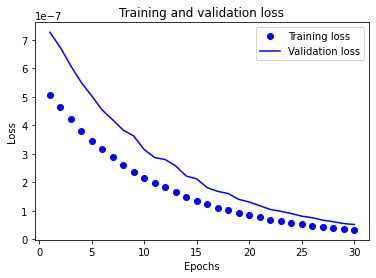

In [0]:
# Checking Overfit
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

